# 데이터셋 불러오기

In [1]:
import pandas as pd 

pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('./news_df_final.csv', encoding='utf-8')
df.head()

,title,url
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   url     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


------------------

## 유사 제목 제거

import difflib

df['index_'] = df.index

def similarites(row): # change similiar titles to indexs
    similar = 'none'
    
    similarities_list  = difflib.get_close_matches(row, list(df[df.title!=row].title), cutoff = 0.8)
    
    if len(similarities_list) > 0:
        for i in similarities_list:
            print(i)
            
    print("***")


df['title_similar'] = df.title.apply(lambda row: difflib.get_close_matches(row, list(df[df.title!=row].title), cutoff = 0.8))

df['title_similar_index'] = df.title.apply(lambda row : similarites(row))

In [4]:
df

,title,url
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800
...,...,...
995,"룸메이트 굶기고, 폭행·살해한 20대 남성, 징역 16년",http://www.goodmorningcc.com/news/articleView.html?idxno=272604
996,"카슈끄지 전 변호인, UAE서 탈세 등 혐의로 징역 3년",https://www.jeonmae.co.kr/news/articleView.html?idxno=902926
997,"남편 흉기살해 80대 집행유예형.. ""심한 치매 증상""",http://www.jmbc.co.kr/news/view/25307
998,"文, 11명 살해한 조선족엔 ""따뜻하게 품어야""… 탈북 어민엔 ""살인범"" 이유로...",https://www.newdaily.co.kr/site/data/html/2022/07/13/2022071300188.html


df['title_similar']  = df.title_similar.apply(lambda row:  ' '.join(row) )

df

count=0
index =0
similar_news = []

for title in df['title_similar']:
    if len(title) == 0:
        count+=1
    else:
        similar_news.append(index)
    
    index +=1

print('unique news title:',count)

duplicated = df[df.duplicated(subset=['title_similar'])]
duplicated.info()

df.drop_duplicates(subset=['title_similar'])
df.reset_index(drop=True,inplace = True) # 인덱스 리셋

df.head()

-----------

## 처벌 

In [5]:
import re

for i in range(len(df)): 
    news = df.loc[i,'title']

    news = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', news)
    news = re.sub('\s{2,}',' ',news) 
    print(news)
    news =  re.findall('[가-힣]+형\s|사형|무기징역|징역\s*\d*년',news)     # 예. 집행유예형 ... 
    news = ' '.join(news)

    
    df.loc[i,'징역']= news

제주 중학생 살해 백광석 김시남 징역 30년 27년 확정
 제주 중학생 살해 백광석 김시남 징역 30년 27년 확정
동료 수형자 상습폭행 살해한 무기수 또 무기징역 유족 울분 
마포 주택가 살인 50대 징역 30년 불복 항소
공주교도소 동료 재소자 살인 20대 무기징역 선고 종합 
살인죄로 복역 중 교도소서 또 살해 무기징역 두 번 선고 받았다
이혼 요구 아내 살해한 50대 징역 20년 확정
 금전문제 흉기로 수십회 찔러 살해 50대 징역 30년 국민참여재판 가보니
 그알 완도 일가족 사망사건 부모 선택으로 살해당하는 아이들
아버지 시신 냉장고 보관 아들 존속살해 혐의로 구속기소
 잔혹 평가는 어려워 마포 데이트폭력 살해 30대 징역7년 확정
 소중한것 뺏을게 사실혼女 아들 잔혹살해 70대까지 수감
 왜 내 거래처 가로채 지인 흉기로 살해한 60대 징역 18년
 속보 공주교도소 동료 재소자 살해 20대 무기징역 선고
5살 아들 고문하고 굶겨 살해한 부모에게 징역 100년형 선고한 미국 법원
살인 복역 중 동료 수형자 살해 무기징역 에 유족 분통
검찰 두 아들 살해 母 징역 20년 불복 쌍방항소
이혼서류 보냈다고 아내 목 졸라 살해한 남편 징역 20년 확정
 살해 의도 없었다 마포 살인 남성 징역 7년에 女커뮤니티 반발
사회복지시설서 함께 지냈던 동료 살해하려던 60대 징역 10년
굶주려 개사료까지 2살 딸 학대살해한 부모 징역 30년
30년간 가정폭력 끝에 아내 살해한 50대 징역 20년 확정
 15세 소년에 무기징역 뉴질랜드 법원 판결에 양형 논란 
자녀가 부모 소유물 세종시서 또 발생한 자녀살해
 연쇄 살인 사체유기 권재찬 공사장 절도 항소심에서도 징역형
 실화탐사대 정창욱 폭행논란→이은해 남편 살해혐의 그 후
생활고 시달려 아들 2명 살해한 친모 징역 20년
여친 19층서 밀어 살해한 30대 징역 25년 불복해 항소
차량 절벽 추락사고로 80대 노모 살해한 아들 징역 6년 
유부녀와 바람 핀 남자친구 모텔서 살해한 30대 징역 15년
 34억 유산 탐욕에

In [6]:
df.head(30)

,title,url,징역
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,징역 30년
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,징역 30년
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,무기징역
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482,징역 30년
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800,무기징역
5,살인죄로 복역 중 교도소서 또 살해…무기징역 두 번 선고 받았다,https://www.sedaily.com/NewsView/268P320YAB,무기징역
6,"이혼 요구 아내 살해한 50대, 징역 20년 확정",https://www.chosun.com/national/court_law/2022/07/26/YM5YFMQEWBDWFGYYJBYRAVK6QQ/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news,징역 20년
7,"'금전문제' 흉기로 수십회 찔러 살해 50대, 징역 30년…국민참여재판 가보니",https://view.asiae.co.kr/article/2022072920355113406,징역 30년
8,"‘그알’ 완도 일가족 사망사건, 부모 선택으로 살해당하는 아이들",https://www.newsen.com/news_view.php?uid=202207291513272410,
9,"아버지 시신 냉장고 보관 아들, 존속살해 혐의로 구속기소",http://www.ichannela.com/news/main/news_detailPage.do?publishId=000000306981,


-----------------

# 정규표현식과 명사

In [7]:
from konlpy.tag import Okt
import re

for i in range(len(df)): # df 의 행 수만큼 for 문 돌린다.
    news = df.loc[i,'title'] # news 컬럼만의 각 값을 순서대로 가져온다.
    news =  re.findall('[가-힣]+|[가-힣]+\d+|\d+[가-힣]+',news)    # 가져온 행의 값에서 정규표현식 수행 # 영어 추가..\w
    news = ' '.join(news) # 위에서는 한글과 숫자만 추출된 요소들이 list 안에 있으니 전부를 하나로 묶어줌, 이때 스페이스로 분리
    news = re.sub('^\s+|\s+$|\s{2,}','',news) # 불필요한 공백들을 전부 제거

    okt = Okt()
    morph = okt.pos(news)
    noun_list = []
    for word, tag in morph:
        if (tag=='Noun') & (len(word) > 1):# 형용사 
            noun_list.append(word)
    noun_list= ' '.join(noun_list)
    
    df.loc[i,'nouns']= noun_list

----------

# 가해자 나이 컬럼 (가능하면 정규표현식으로)

import re

for i in range(len(df)): 
    news = df.loc[i,'title'] 
    news =  re.search('살해\w*\s(\d+)[대]',news)
    if news:
        news = news.group()
    

    df.loc[i,'age']= news
    
df.head(30)

In [8]:
import re

for i in range(len(df)): # df 의 행 수만큼 for 문 돌린다.
    news = df.loc[i,'title'] # news 컬럼만의 각 값을 순서대로 가져온다.
    news =  re.findall('(\d+)[대]',news)    # 가져온 행의 값에서 정규표현식 수행 # 영어 추가..\w
    
    if len(news)== 0:
        news= '알수없음'
    
    elif len(news) > 1 : # 두개 나오는 경우가 있는데 보통 가해자는 뒷쪽에 나오기 때문에 두번째 것
        news = news[1]
    else:
        news = news[0]

    df.loc[i,'age']= news
    
df.head(30)

,title,url,징역,nouns,age
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,무기징역,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,알수없음
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482,징역 30년,마포 주택가 살인 징역 불복 항소,50
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800,무기징역,공주교도소 동료 재소 살인 무기징역 선고 종합,20
5,살인죄로 복역 중 교도소서 또 살해…무기징역 두 번 선고 받았다,https://www.sedaily.com/NewsView/268P320YAB,무기징역,살인죄 복역 교도소 살해 무기징역 선고,알수없음
6,"이혼 요구 아내 살해한 50대, 징역 20년 확정",https://www.chosun.com/national/court_law/2022/07/26/YM5YFMQEWBDWFGYYJBYRAVK6QQ/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news,징역 20년,이혼 요구 아내 살해 징역 확정,50
7,"'금전문제' 흉기로 수십회 찔러 살해 50대, 징역 30년…국민참여재판 가보니",https://view.asiae.co.kr/article/2022072920355113406,징역 30년,금전 문제 흉기 살해 징역 국민 참여 재판,50
8,"‘그알’ 완도 일가족 사망사건, 부모 선택으로 살해당하는 아이들",https://www.newsen.com/news_view.php?uid=202207291513272410,,완도 가족 사망 사건 부모 선택 살해 아이,알수없음
9,"아버지 시신 냉장고 보관 아들, 존속살해 혐의로 구속기소",http://www.ichannela.com/news/main/news_detailPage.do?publishId=000000306981,,아버지 시신 냉장고 보관 아들 존속살해 혐의 구속기소,알수없음


-------------

## 국내로 제한하기
1. 제외 대상인 국가 리스트  추출 

In [9]:
#https://ko.wiktionary.org/wiki/%EB%B6%80%EB%A1%9D:%EC%84%B8%EA%B3%84%EC%9D%98_%EB%82%98%EB%9D%BC# Q. 네이버 영화 랭킹 가져와서 첫번째 영화제목을 출력하세요
from bs4 import BeautifulSoup
import requests as rq
import re
import pandas

url = 'https://ko.wiktionary.org/wiki/%EB%B6%80%EB%A1%9D:%EC%84%B8%EA%B3%84%EC%9D%98_%EB%82%98%EB%9D%BC'
html = rq.get(url) # 사이트 열기
html = html.text # 내용 추출
bs = BeautifulSoup(html,'lxml')
countries = bs.find_all('tr') 

country_list = []
for country in countries:
    country=country.find('td') # 첫번째 열에 국가 이름이 있기 때문
    if  country:
        country = country.get_text()
        country = country[:-1] # 이름 마다 끝에 \n 이 있어서 
        country_list.append(country)

country_list.append('아베')
country_list.remove('한국')
country_list.append('중국')

In [10]:
country_list

['가나',
 '가봉',
 '가이아나',
 '감비아',
 '과테말라',
 '그레나다 / 그레네이더',
 '그루지야',
 '그리스',
 '기니',
 '기니비사우 / 기네비싸우',
 '나미비아',
 '나우루',
 '나이지리아',
 '남수단',
 '남아프리카 공화국',
 '네덜란드 / 네데를란드',
 '네팔',
 '노르웨이',
 '뉴질랜드',
 '니제르',
 '니카라과',
 '덴마크',
 '도미니카 연방',
 '도미니카 공화국',
 '독일',
 '동티모르',
 '라오스',
 '라이베리아',
 '라트비아',
 '러시아',
 '레바논',
 '레소토',
 '루마니아',
 '룩셈부르크',
 '르완다',
 '리비아',
 '리투아니아',
 '리히텐슈타인',
 '마다가스카르',
 '마셜 제도',
 '말라위',
 '말레이시아',
 '말리',
 '멕시코',
 '모나코',
 '모로코',
 '모리셔스',
 '모리타니',
 '모잠비크',
 '몬테네그로',
 '몰도바',
 '몰디브',
 '몰타',
 '몽골',
 '미국',
 '미얀마 (버마)',
 '미크로네시아 연방',
 '바누아투',
 '바레인',
 '바베이도스',
 '바티칸',
 '바하마',
 '방글라데시',
 '베네수엘라',
 '베냉',
 '베트남',
 '벨기에',
 '벨라루스',
 '벨리즈',
 '보스니아 헤르체고비나',
 '보츠와나',
 '볼리비아',
 '부룬디',
 '부르키나파소',
 '부탄',
 '북마케도니아',
 '북조선(북한)',
 '불가리아',
 '브라질',
 '브루나이',
 '산마리노',
 '사모아',
 '사우디아라비아',
 '상투메 프린시페',
 '세네갈',
 '세르비아',
 '세이셸',
 '세인트루시아',
 '세인트빈센트 그레나딘',
 '세인트키츠 네비스',
 '소말리아',
 '솔로몬 제도',
 '수단',
 '수리남',
 '스리랑카',
 '스웨덴',
 '스위스',
 '스페인(에스파냐)',
 '슬로바키아',
 '슬로베니아',
 '시리아',
 '시에라리온',
 '싱가포르',
 '아랍에미리트',
 '아르메니아',
 '아르

In [11]:
df.head(15)

,title,url,징역,nouns,age
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,무기징역,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,알수없음
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482,징역 30년,마포 주택가 살인 징역 불복 항소,50
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800,무기징역,공주교도소 동료 재소 살인 무기징역 선고 종합,20
5,살인죄로 복역 중 교도소서 또 살해…무기징역 두 번 선고 받았다,https://www.sedaily.com/NewsView/268P320YAB,무기징역,살인죄 복역 교도소 살해 무기징역 선고,알수없음
6,"이혼 요구 아내 살해한 50대, 징역 20년 확정",https://www.chosun.com/national/court_law/2022/07/26/YM5YFMQEWBDWFGYYJBYRAVK6QQ/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news,징역 20년,이혼 요구 아내 살해 징역 확정,50
7,"'금전문제' 흉기로 수십회 찔러 살해 50대, 징역 30년…국민참여재판 가보니",https://view.asiae.co.kr/article/2022072920355113406,징역 30년,금전 문제 흉기 살해 징역 국민 참여 재판,50
8,"‘그알’ 완도 일가족 사망사건, 부모 선택으로 살해당하는 아이들",https://www.newsen.com/news_view.php?uid=202207291513272410,,완도 가족 사망 사건 부모 선택 살해 아이,알수없음
9,"아버지 시신 냉장고 보관 아들, 존속살해 혐의로 구속기소",http://www.ichannela.com/news/main/news_detailPage.do?publishId=000000306981,,아버지 시신 냉장고 보관 아들 존속살해 혐의 구속기소,알수없음


2. 국가 이름이 언급된 뉴스 제목들은 제거 

In [12]:
index = 0
delete_rows = []
for i in range(len(df)): 
    nouns = df.loc[i,'nouns'] #제목 내에 명사들
    nouns = nouns.split()
    for noun in nouns: # 각 명사 살펴보기
        if noun in country_list: # 리스트에 있으면 제거 요소로 추가
            print(noun)
            delete_rows.append(index)
        else: 
            pass
        
    index +=1

print(delete_rows)
df.drop(set(delete_rows), inplace=True) # 한 제목에 여러 국가 관련 단어 들어있을 수 잇으니 unique 로 
df

미국
뉴질랜드
콜롬비아
콜롬비아
필리핀
필리핀
필리핀
필리핀
필리핀
일본
아베
필리핀
필리핀
필리핀
카자흐스탄
필리핀
말리
우즈베키스탄
[14, 22, 73, 256, 463, 682, 751, 769, 793, 795, 795, 818, 837, 843, 930, 964, 973, 979]


,title,url,징역,nouns,age
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,무기징역,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,알수없음
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482,징역 30년,마포 주택가 살인 징역 불복 항소,50
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800,무기징역,공주교도소 동료 재소 살인 무기징역 선고 종합,20
...,...,...,...,...,...
995,"룸메이트 굶기고, 폭행·살해한 20대 남성, 징역 16년",http://www.goodmorningcc.com/news/articleView.html?idxno=272604,징역 16년,룸메이트 폭행 살해 남성 징역,20
996,"카슈끄지 전 변호인, UAE서 탈세 등 혐의로 징역 3년",https://www.jeonmae.co.kr/news/articleView.html?idxno=902926,징역 3년,카슈끄 변호인 탈세 혐의 징역,알수없음
997,"남편 흉기살해 80대 집행유예형.. ""심한 치매 증상""",http://www.jmbc.co.kr/news/view/25307,집행유예형,남편 흉기 살해 집행유예 치매 증상,80
998,"文, 11명 살해한 조선족엔 ""따뜻하게 품어야""… 탈북 어민엔 ""살인범"" 이유로...",https://www.newdaily.co.kr/site/data/html/2022/07/13/2022071300188.html,,살해 조선족 탈북 어민 살인 이유,알수없음


In [13]:
df.head(50)

,title,url,징역,nouns,age
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,무기징역,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,알수없음
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482,징역 30년,마포 주택가 살인 징역 불복 항소,50
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800,무기징역,공주교도소 동료 재소 살인 무기징역 선고 종합,20
5,살인죄로 복역 중 교도소서 또 살해…무기징역 두 번 선고 받았다,https://www.sedaily.com/NewsView/268P320YAB,무기징역,살인죄 복역 교도소 살해 무기징역 선고,알수없음
6,"이혼 요구 아내 살해한 50대, 징역 20년 확정",https://www.chosun.com/national/court_law/2022/07/26/YM5YFMQEWBDWFGYYJBYRAVK6QQ/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news,징역 20년,이혼 요구 아내 살해 징역 확정,50
7,"'금전문제' 흉기로 수십회 찔러 살해 50대, 징역 30년…국민참여재판 가보니",https://view.asiae.co.kr/article/2022072920355113406,징역 30년,금전 문제 흉기 살해 징역 국민 참여 재판,50
8,"‘그알’ 완도 일가족 사망사건, 부모 선택으로 살해당하는 아이들",https://www.newsen.com/news_view.php?uid=202207291513272410,,완도 가족 사망 사건 부모 선택 살해 아이,알수없음
9,"아버지 시신 냉장고 보관 아들, 존속살해 혐의로 구속기소",http://www.ichannela.com/news/main/news_detailPage.do?publishId=000000306981,,아버지 시신 냉장고 보관 아들 존속살해 혐의 구속기소,알수없음


In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df.head(20)

,title,url,징역,nouns,age
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,무기징역,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,알수없음
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482,징역 30년,마포 주택가 살인 징역 불복 항소,50
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800,무기징역,공주교도소 동료 재소 살인 무기징역 선고 종합,20
5,살인죄로 복역 중 교도소서 또 살해…무기징역 두 번 선고 받았다,https://www.sedaily.com/NewsView/268P320YAB,무기징역,살인죄 복역 교도소 살해 무기징역 선고,알수없음
6,"이혼 요구 아내 살해한 50대, 징역 20년 확정",https://www.chosun.com/national/court_law/2022/07/26/YM5YFMQEWBDWFGYYJBYRAVK6QQ/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news,징역 20년,이혼 요구 아내 살해 징역 확정,50
7,"'금전문제' 흉기로 수십회 찔러 살해 50대, 징역 30년…국민참여재판 가보니",https://view.asiae.co.kr/article/2022072920355113406,징역 30년,금전 문제 흉기 살해 징역 국민 참여 재판,50
8,"‘그알’ 완도 일가족 사망사건, 부모 선택으로 살해당하는 아이들",https://www.newsen.com/news_view.php?uid=202207291513272410,,완도 가족 사망 사건 부모 선택 살해 아이,알수없음
9,"아버지 시신 냉장고 보관 아들, 존속살해 혐의로 구속기소",http://www.ichannela.com/news/main/news_detailPage.do?publishId=000000306981,,아버지 시신 냉장고 보관 아들 존속살해 혐의 구속기소,알수없음


## 시각화

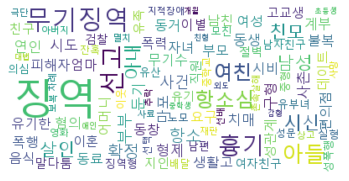

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(df['nouns'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

word_cloud_lst = Counter(nouns)
del word_cloud_lst['살해'] # 살해는 키워드 이기 때문에 제거 

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
df.head(50)

,title,url,징역,nouns,age
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,무기징역,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,알수없음
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482,징역 30년,마포 주택가 살인 징역 불복 항소,50
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800,무기징역,공주교도소 동료 재소 살인 무기징역 선고 종합,20
5,살인죄로 복역 중 교도소서 또 살해…무기징역 두 번 선고 받았다,https://www.sedaily.com/NewsView/268P320YAB,무기징역,살인죄 복역 교도소 살해 무기징역 선고,알수없음
6,"이혼 요구 아내 살해한 50대, 징역 20년 확정",https://www.chosun.com/national/court_law/2022/07/26/YM5YFMQEWBDWFGYYJBYRAVK6QQ/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news,징역 20년,이혼 요구 아내 살해 징역 확정,50
7,"'금전문제' 흉기로 수십회 찔러 살해 50대, 징역 30년…국민참여재판 가보니",https://view.asiae.co.kr/article/2022072920355113406,징역 30년,금전 문제 흉기 살해 징역 국민 참여 재판,50
8,"‘그알’ 완도 일가족 사망사건, 부모 선택으로 살해당하는 아이들",https://www.newsen.com/news_view.php?uid=202207291513272410,,완도 가족 사망 사건 부모 선택 살해 아이,알수없음
9,"아버지 시신 냉장고 보관 아들, 존속살해 혐의로 구속기소",http://www.ichannela.com/news/main/news_detailPage.do?publishId=000000306981,,아버지 시신 냉장고 보관 아들 존속살해 혐의 구속기소,알수없음


## 피해자

In [18]:
from konlpy.tag import Okt
import re

for i in range(len(df)): # df 의 행 수만큼 for 문 돌린다.
    news = df.loc[i,'nouns'] # news 컬럼만의 각 값을 순서대로 가져온다.
    news =  re.findall('([가-힣]*\s*[가-힣]+)\s살해',news)    # 가져온 행의 값에서 정규표현식 수행 # 영어 추가..\w
    news = ' '.join(news) # 위에서는 한글과 숫자만 추출된 요소들이 list 안에 있으니 전부를 하나로 묶어줌, 이때 스페이스로 분리


    
    df.loc[i,'victim']= news
df.head(50)

,title,url,징역,nouns,age,victim
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음,제주 중학생
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음,제주 중학생
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,무기징역,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,알수없음,상습 폭행
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482,징역 30년,마포 주택가 살인 징역 불복 항소,50,
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800,무기징역,공주교도소 동료 재소 살인 무기징역 선고 종합,20,
5,살인죄로 복역 중 교도소서 또 살해…무기징역 두 번 선고 받았다,https://www.sedaily.com/NewsView/268P320YAB,무기징역,살인죄 복역 교도소 살해 무기징역 선고,알수없음,복역 교도소
6,"이혼 요구 아내 살해한 50대, 징역 20년 확정",https://www.chosun.com/national/court_law/2022/07/26/YM5YFMQEWBDWFGYYJBYRAVK6QQ/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news,징역 20년,이혼 요구 아내 살해 징역 확정,50,요구 아내
7,"'금전문제' 흉기로 수십회 찔러 살해 50대, 징역 30년…국민참여재판 가보니",https://view.asiae.co.kr/article/2022072920355113406,징역 30년,금전 문제 흉기 살해 징역 국민 참여 재판,50,문제 흉기
8,"‘그알’ 완도 일가족 사망사건, 부모 선택으로 살해당하는 아이들",https://www.newsen.com/news_view.php?uid=202207291513272410,,완도 가족 사망 사건 부모 선택 살해 아이,알수없음,부모 선택
9,"아버지 시신 냉장고 보관 아들, 존속살해 혐의로 구속기소",http://www.ichannela.com/news/main/news_detailPage.do?publishId=000000306981,,아버지 시신 냉장고 보관 아들 존속살해 혐의 구속기소,알수없음,


In [22]:
from konlpy.tag import Okt
import re

for i in range(len(df)): # df 의 행 수만큼 for 문 돌린다.
    news = df.loc[i,'nouns'] # news 컬럼만의 각 값을 순서대로 가져온다.
    news =  re.findall('([가-힣]*\s*[가-힣]+)\s살인',news)    # 가져온 행의 값에서 정규표현식 수행 # 영어 추가..\w
    news = ' '.join(news) # 위에서는 한글과 숫자만 추출된 요소들이 list 안에 있으니 전부를 하나로 묶어줌, 이때 스페이스로 분리


    
    df.loc[i,'victim2']= news
df.head(50)

,title,url,징역,nouns,age,victim,victim2
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음,제주 중학생,
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음,제주 중학생,
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,무기징역,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,알수없음,상습 폭행,
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482,징역 30년,마포 주택가 살인 징역 불복 항소,50,,마포 주택가
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800,무기징역,공주교도소 동료 재소 살인 무기징역 선고 종합,20,,동료 재소
5,살인죄로 복역 중 교도소서 또 살해…무기징역 두 번 선고 받았다,https://www.sedaily.com/NewsView/268P320YAB,무기징역,살인죄 복역 교도소 살해 무기징역 선고,알수없음,복역 교도소,
6,"이혼 요구 아내 살해한 50대, 징역 20년 확정",https://www.chosun.com/national/court_law/2022/07/26/YM5YFMQEWBDWFGYYJBYRAVK6QQ/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news,징역 20년,이혼 요구 아내 살해 징역 확정,50,요구 아내,
7,"'금전문제' 흉기로 수십회 찔러 살해 50대, 징역 30년…국민참여재판 가보니",https://view.asiae.co.kr/article/2022072920355113406,징역 30년,금전 문제 흉기 살해 징역 국민 참여 재판,50,문제 흉기,
8,"‘그알’ 완도 일가족 사망사건, 부모 선택으로 살해당하는 아이들",https://www.newsen.com/news_view.php?uid=202207291513272410,,완도 가족 사망 사건 부모 선택 살해 아이,알수없음,부모 선택,
9,"아버지 시신 냉장고 보관 아들, 존속살해 혐의로 구속기소",http://www.ichannela.com/news/main/news_detailPage.do?publishId=000000306981,,아버지 시신 냉장고 보관 아들 존속살해 혐의 구속기소,알수없음,,


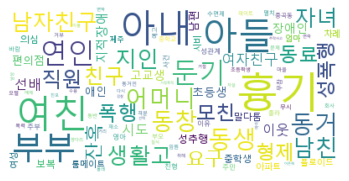

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(df['victim'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
import collections
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

nouns = ' '.join(df['victim'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

noun_lst = Counter(nouns)
topnouns = noun_lst.most_common(50)
topnouns



[('흉기', 77),
 ('아들', 58),
 ('여친', 57),
 ('아내', 56),
 ('부부', 40),
 ('연인', 30),
 ('둔기', 30),
 ('동생', 23),
 ('동거', 23),
 ('어머니', 22),
 ('동창', 22),
 ('남친', 21),
 ('지인', 20),
 ('자녀', 20),
 ('생활고', 20),
 ('남자친구', 20),
 ('폭행', 17),
 ('동료', 17),
 ('직원', 17),
 ('친구', 17),
 ('모친', 16),
 ('형제', 16),
 ('성폭행', 16),
 ('요구', 15),
 ('잔혹', 15),
 ('여자친구', 15),
 ('선배', 14),
 ('시도', 14),
 ('이웃', 14),
 ('지적장애', 13),
 ('장애인', 12),
 ('고교생', 12),
 ('초등생', 12),
 ('남편', 11),
 ('편의점', 11),
 ('애인', 11),
 ('보복', 10),
 ('성추행', 10),
 ('중학생', 9),
 ('말다툼', 9),
 ('의심', 9),
 ('시비', 8),
 ('차례', 8),
 ('룸메이트', 8),
 ('아파트', 8),
 ('여성', 8),
 ('플로이드', 8),
 ('제주', 7),
 ('엄마', 7),
 ('사건', 6)]

## 결과

In [21]:
df

,title,url,징역,nouns,age,victim
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음,제주 중학생
1,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,징역 30년,제주 중학생 살해 광석 김시 징역 확정,알수없음,제주 중학생
2,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,무기징역,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,알수없음,상습 폭행
3,"마포 '주택가 살인' 50대, 징역 30년 불복 항소",http://www.fnnews.com/news/202207291729519482,징역 30년,마포 주택가 살인 징역 불복 항소,50,
4,공주교도소 동료 재소자 살인 20대 '무기징역' 선고(종합),http://www.newsis.com/view/?id=NISX20220727_0001957793&cID=10807&pID=10800,무기징역,공주교도소 동료 재소 살인 무기징역 선고 종합,20,
...,...,...,...,...,...,...
978,"룸메이트 굶기고, 폭행·살해한 20대 남성, 징역 16년",http://www.goodmorningcc.com/news/articleView.html?idxno=272604,징역 16년,룸메이트 폭행 살해 남성 징역,20,룸메이트 폭행
979,"카슈끄지 전 변호인, UAE서 탈세 등 혐의로 징역 3년",https://www.jeonmae.co.kr/news/articleView.html?idxno=902926,징역 3년,카슈끄 변호인 탈세 혐의 징역,알수없음,
980,"남편 흉기살해 80대 집행유예형.. ""심한 치매 증상""",http://www.jmbc.co.kr/news/view/25307,집행유예형,남편 흉기 살해 집행유예 치매 증상,80,남편 흉기
981,"文, 11명 살해한 조선족엔 ""따뜻하게 품어야""… 탈북 어민엔 ""살인범"" 이유로...",https://www.newdaily.co.kr/site/data/html/2022/07/13/2022071300188.html,,살해 조선족 탈북 어민 살인 이유,알수없음,
